# Q1 !

In [2]:
import pandas as pd 
import numpy as np 
import re 
import seaborn as sns
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup 
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
import ast

In [3]:
folder = "generated/"

df_movies=pd.read_csv(folder + "USE_THIS_DATASET.csv", index_col = 'Wikipedia movie ID')
df_movies['decade'] = (df_movies['Movie release year'] // 10) * 10

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Apply the function to create a 'season' column
df_movies['season'] = df_movies['Movie release month'].apply(month_to_season)


df_movies.sample(5)

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Summary,Sentiment,Compound Score,Theme,vote_average,budget,decade,season
Wikipedia movie ID,,,,,,,,,,,,,,,,,
25808203,Blessings of the Land,12.0,1959.0,1959-12-16,NaN,111.0,"['Tagalog', 'Filipino']",['Philippines'],['Filipino Movies'],Maria and Jose begin their married life by est...,negative,-0.9692,Revenge,7.000,NaN,1950.0,Winter
28968880,Emil and the Detectives,2.0,2001.0,2001-02-22,NaN,110.0,['German'],['Germany'],['Family Film'],The twelve-year-old Emil and his father are ha...,negative,-0.9477,Adventure,5.700,NaN,2000.0,Winter
7558604,Little Jerusalem,5.0,2005.0,2005-05-16,NaN,94.0,"['French', 'Arabic', 'Hebrew']",['France'],"['Drama', 'Coming of age', 'Art film', 'World ...","Laura, played by Fanny Valette, is a Jewish ph...",positive,0.9474,Conflict,NaN,NaN,2000.0,Spring
161974,A Shock to the System,3.0,1990.0,1990-03-23,NaN,93.0,['English'],['United States of America'],"['Thriller', 'Comedy-drama', 'Comedy Thriller'...","A family man named Graham Marshall, a long-tim...",negative,-0.9928,Revenge,6.396,NaN,1990.0,Spring
33201358,A Few Best Men,1.0,2012.0,2012-01-26,1.322097e+07,91.0,['English'],"['Australia', 'United Kingdom']",['Comedy'],"While on holiday, David and Mia meet and fal...",negative,-0.4118,Romance,NaN,NaN,2010.0,Winter


In [4]:
df_2 = df_movies[df_movies['Movie countries'].apply(lambda x: 'United States of America' in x)]

df_2['Movie genres'] = df_2['Movie genres'].apply(ast.literal_eval)
df_exploded = df_2.explode('Movie genres')

C:\Users\nicol\AppData\Local\Temp\ipykernel_34708\2972396539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Movie genres'] = df_2['Movie genres'].apply(ast.literal_eval)


In [5]:
top_10_genres = df_exploded['Movie genres'].value_counts().sort_values(ascending=False).head(10)
top_10_genres

Movie genres
Drama              13251
Comedy              9699
Black-and-white     6112
Indie               5475
Short Film          4998
Thriller            4911
Action              4534
Romance Film        4470
Crime Fiction       3630
Silent film         3308
Name: count, dtype: int64

In [6]:
df_movies.isna().sum()

Movie name                      0
Movie release month         21171
Movie release year           6834
Movie release date          21171
Movie box office revenue    70535
Movie runtime               20379
Movie languages                 0
Movie countries                 0
Movie genres                    0
Summary                     19378
Sentiment                   19378
Compound Score              19378
Theme                       19605
vote_average                39682
budget                      73232
decade                       6834
season                      21171
dtype: int64

## What Drives Movie Success: Genres, Themes, or Release Timing?

To guide her analysis effectively, Annabel considers which factors contribute most to a movie’s success. Taking the perspective of a producer focused solely on maximizing revenue, she chooses to evaluate success based on profitability, measured as the ratio of box office revenue to production budget. This approach reflects financial success regardless of audience appreciation, which isn’t always a reliable indicator in today’s market (as seen with recent Star Wars episodes). 

Note: We assume that the dataset is representative of the movie industry in terms of genre distribution, meaning no specific genre is disproportionately underrepresented in any given year. However, the overall number of movies in the dataset may not be evenly distributed across time, as older movies (e.g., from 100 years ago) are less likely to be included compared to more recent releases, which does not mean there were lesser movies in the past.

After merging data from multiple sources, Annabel is left with movie records spanning over 100 years. She wonders whether including such old data is meaningful and won't harm her analysis, given how much society has evolved over time. Factors like movie runtimes, peak release months, popular genres, and dominant themes may have changed significantly. For example, early films often had shorter runtimes due to technological limitations, while genres like superhero movies only gained popularity in recent decades. 

In an attempt to find out, 

### Did the most profitables genres change over time?
X-axis: Year (historical range)
Y-axis: Movie genre
Color Intensity: Average profitability -> I hope not take last decade only???



In [9]:
#Filter df to only keep USA movies and non-nan rows
df_filtered = df_movies.dropna(subset=['budget', 'Movie box office revenue','Movie release year','Movie runtime'])
df_filtered = df_filtered[df_filtered['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_filtered = df_filtered[df_filtered['budget'] > 10000]

df_filtered['profitability'] = df_filtered['Movie box office revenue']/df_filtered['budget']

df_filtered = df_filtered[df_filtered['profitability'] < 15]


In [10]:
#Number of movies remaining for our study : 
df_filtered.shape

(4683, 18)

In [11]:
df_filtered.isna().sum()

Movie name                  0
Movie release month         0
Movie release year          0
Movie release date          0
Movie box office revenue    0
Movie runtime               0
Movie languages             0
Movie countries             0
Movie genres                0
Summary                     0
Sentiment                   0
Compound Score              0
Theme                       9
vote_average                7
budget                      0
decade                      0
season                      0
profitability               0
dtype: int64

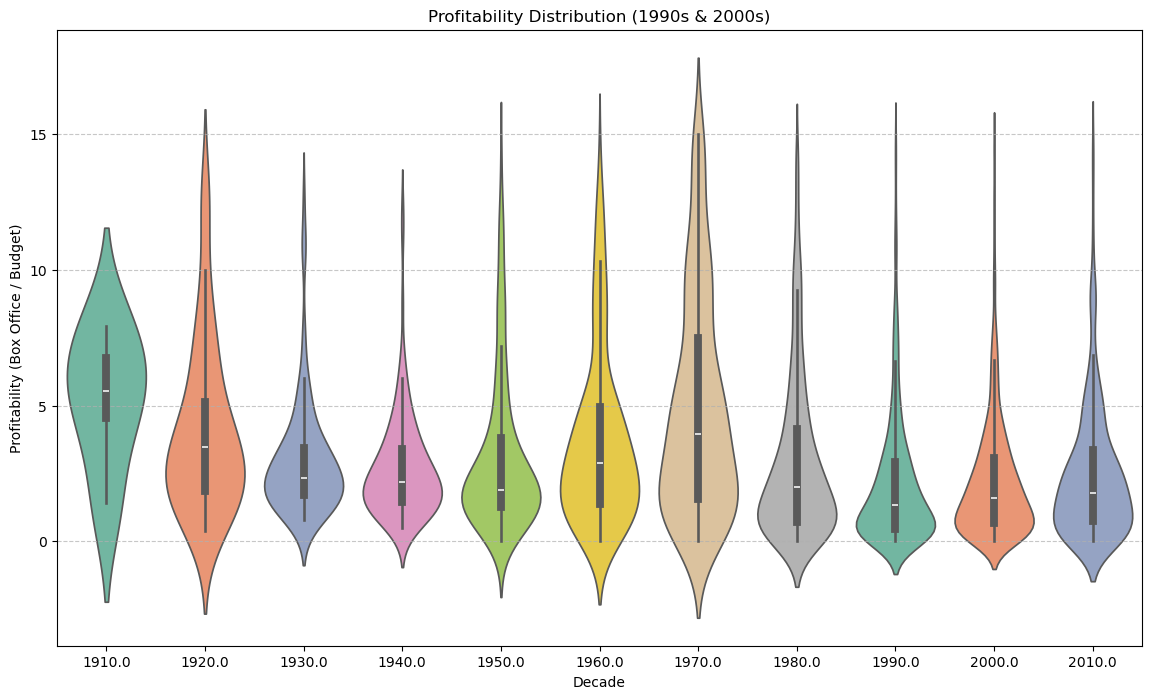

In [12]:
plt.figure(figsize=(14, 8))

sns.violinplot(
    x="decade",
    y="profitability",
    data=df_filtered,
    legend=False,
    hue = "decade",
    palette = "Set2"
)

plt.title("Profitability Distribution (1990s & 2000s)")
plt.xlabel("Decade")
plt.ylabel("Profitability (Box Office / Budget)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

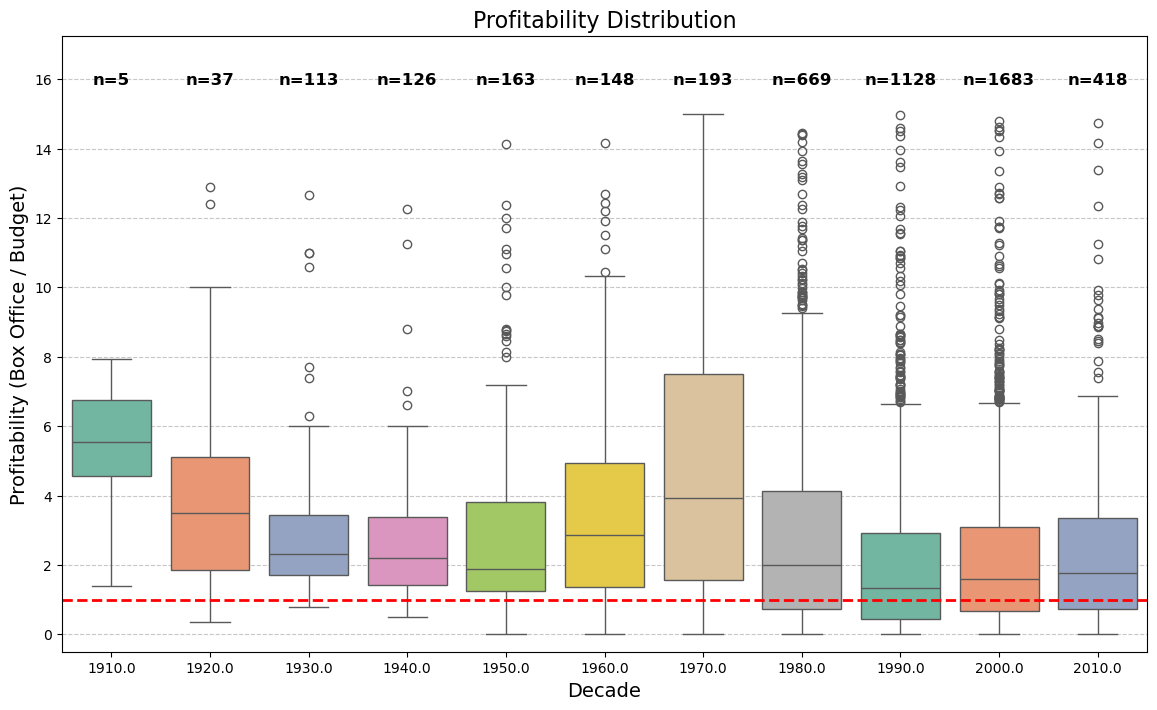

In [13]:
counts = df_filtered['decade'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="decade",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "decade",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)

plt.show()

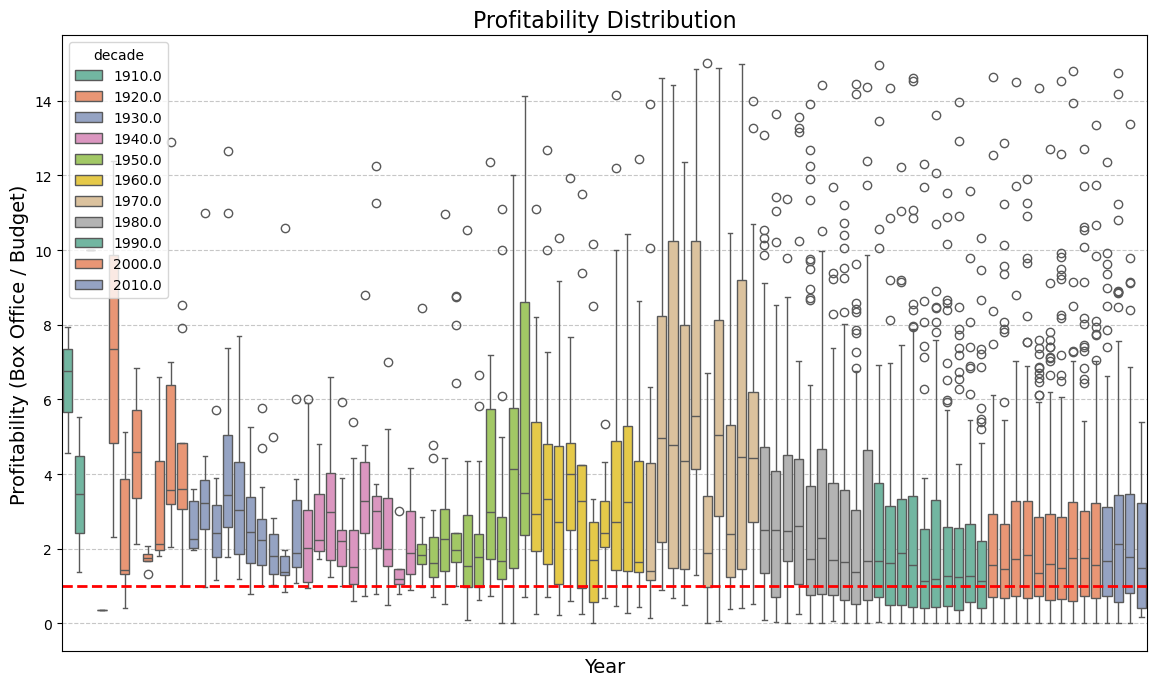

In [14]:
df_filtered["Movie release year"] = df_filtered["Movie release year"].astype(int)

plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release year",
    y="profitability",
    data=df_filtered,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
#plt.xticks(fontsize=6, rotation=45)
plt.xticks([])

plt.show()

In [15]:
#We don't see a specific trend, except where the profitability was boosted in the 1970 and maybe a slight downward trend, and from 1980 onwards more movies that did not turn a profit (profitability below 1). 

### Did most represented genres change Over Time?
One circle with # above 5%, and lineplot for most popular themes
OR 
X-axis: Year
Y-axis: Total #movies Revenue
Area Sections: Different genres (stacked)
Insight: See how genres gained or lost market share over the years.

In [17]:
top_10_genres = df_exploded['Movie genres'].value_counts().sort_values(ascending=False).head(10)
top_10_genres

Movie genres
Drama              13251
Comedy              9699
Black-and-white     6112
Indie               5475
Short Film          4998
Thriller            4911
Action              4534
Romance Film        4470
Crime Fiction       3630
Silent film         3308
Name: count, dtype: int64

In [18]:
#Question : should I use all genres? or just the same as above for consistency?
df_filtered['Movie genres'] = df_filtered['Movie genres'].apply(ast.literal_eval)
df_explode = df_filtered.explode('Movie genres')
top_10_genres = df_explode['Movie genres'].value_counts().sort_values(ascending=False).head(10)



In [19]:
df_genres = df_explode.groupby(['decade', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres = df_genres.loc[df_genres['percentage'] >= 3]

df_genres

,decade,Movie genres,count,total,percentage
0,1910.0,Black-and-white,5,19,26.315789
1,1910.0,Drama,3,19,15.789474
2,1910.0,Indie,5,19,26.315789
3,1910.0,Silent film,5,19,26.315789
4,1910.0,Western,1,19,5.263158
...,...,...,...,...,...
1296,2010.0,Drama,208,1791,11.613624
1307,2010.0,Fantasy,54,1791,3.015075
1351,2010.0,Romance Film,87,1791,4.857621
1358,2010.0,Science Fiction,55,1791,3.070910


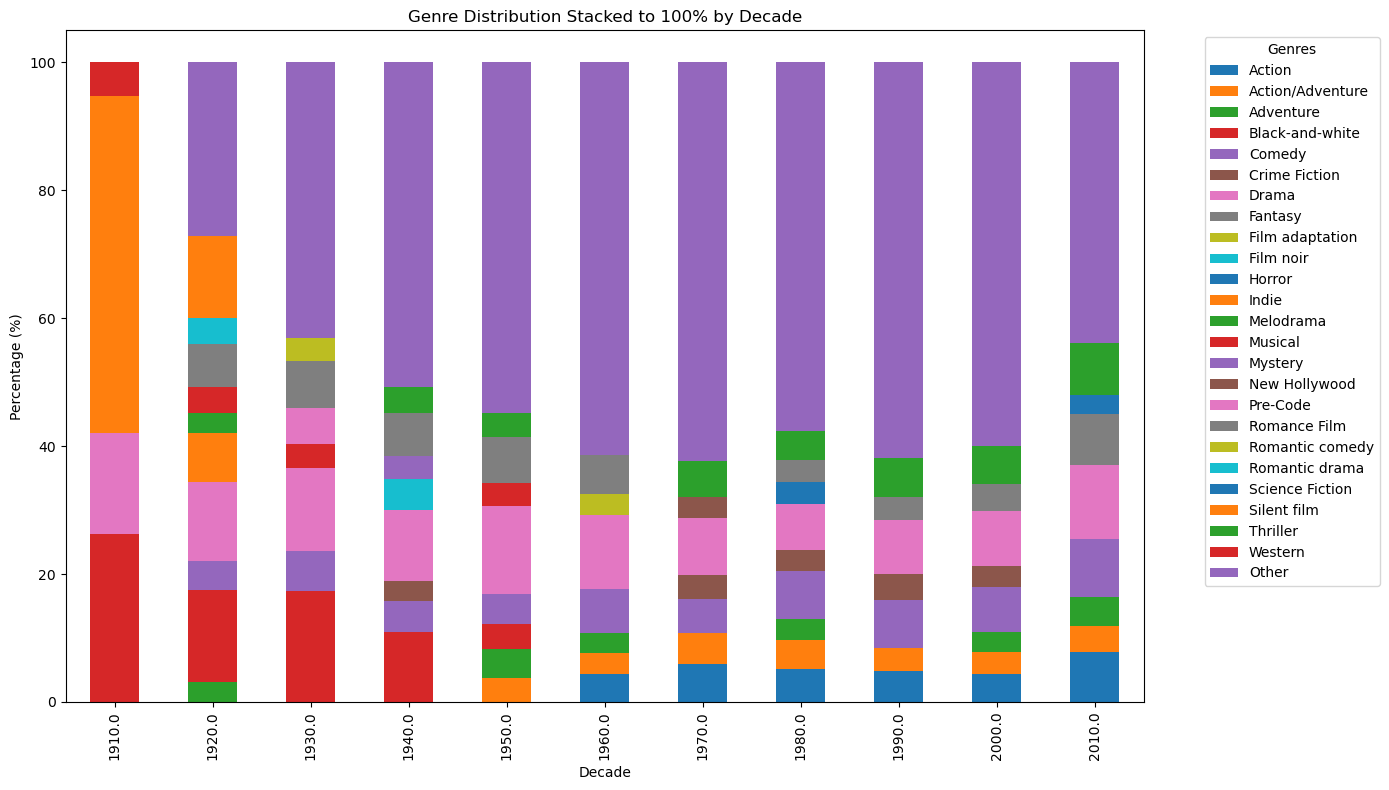

In [20]:
pivot_table = df_genres.pivot(index='decade', columns='Movie genres', values='percentage').fillna(0)

# Add an "Other" category if it doesn't already exist
if 'Other' not in pivot_table.columns:
    pivot_table['Other'] = 100 - pivot_table.sum(axis=1)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title("Genre Distribution Stacked to 100% by Decade")
plt.xlabel("Decade")
plt.ylabel("Percentage (%)")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#changer pour 10 most popular genres

### Profitability vs. Release Month -- change through time?:
X-axis: Month
Y-axis: Profitability
rolling over years

X-axis: Year
Y-axis: Profitability
boxplot

Insight: Check if profitability spikes around specific calendar dates over time?.
**OR**
each year, plot boxplot of average profitability -> propensity score matching
Trend of Average Profitability Over Time. 

**OR**
Heatmap of Av Profitability by Decade and Month
X-axis: Month
Y-axis: Decades (e.g., 1980s, 1990s, 2000s, 2010s)
Color Intensity: Average revenue or profitability

**OR**
7. Violin Plot of Revenue by Season Across Decades
X-axis: Seasons (Winter, Spring, Summer, Fall)
Y-axis: Revenue or profitability
Facet By: Decade
Insight: Compare the distribution and density of revenue across seasons for each decade to spot shifts in audience preferences.

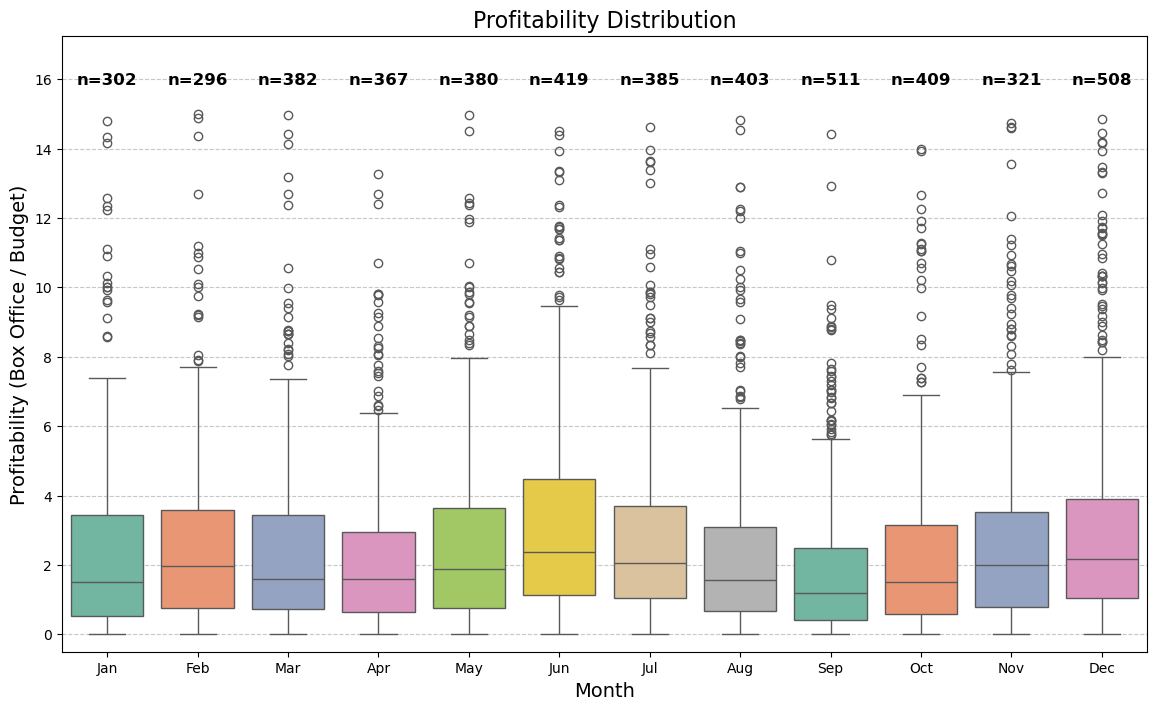

In [22]:
counts = df_filtered['Movie release month'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release month",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "Movie release month",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.show()

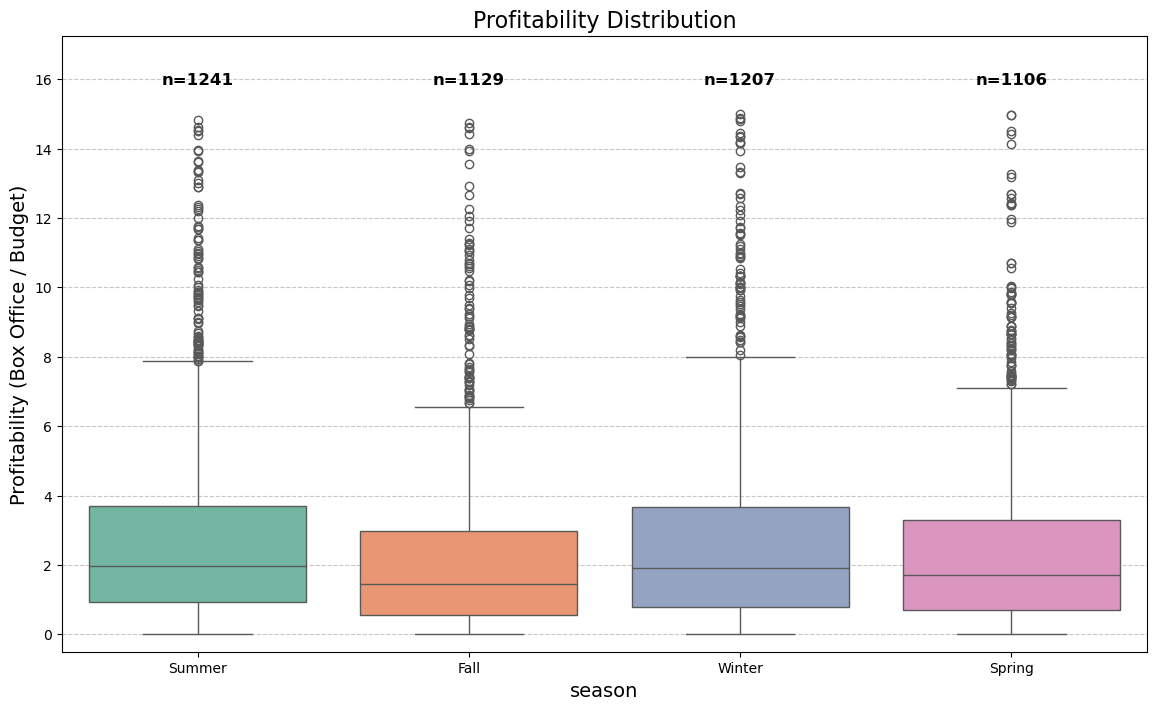

In [23]:
counts = df_filtered['season'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="season",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "season",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("season", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
#month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.show()

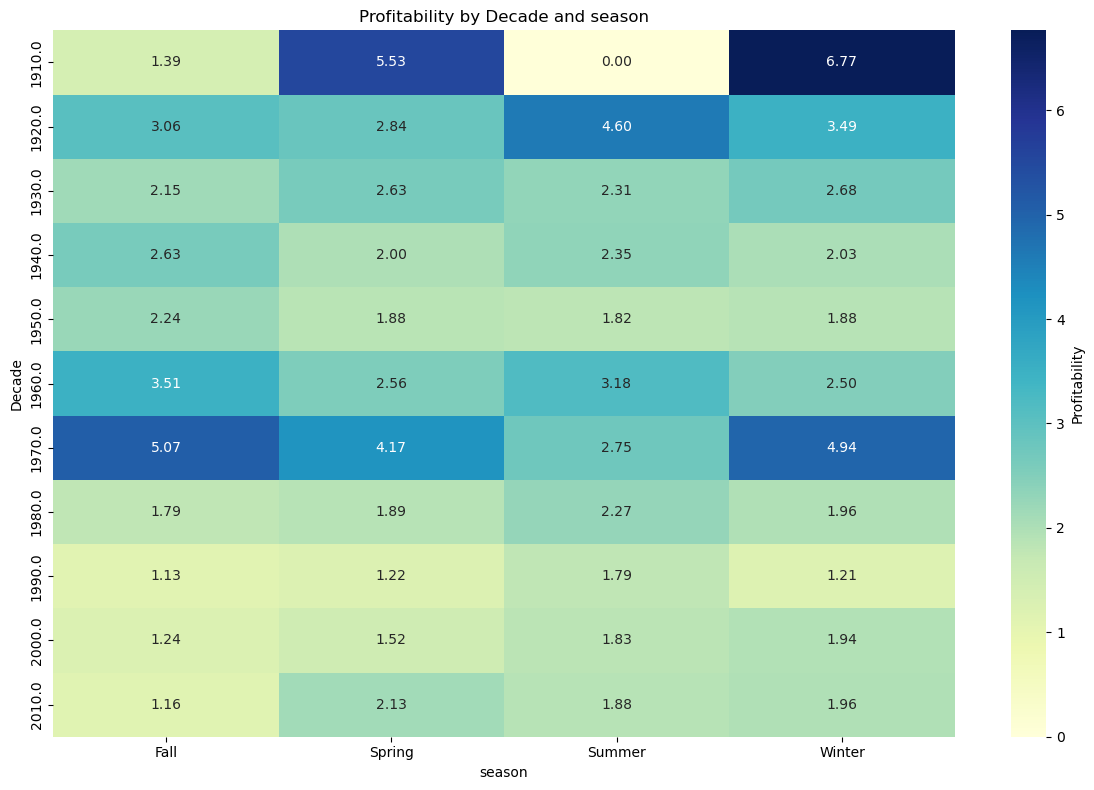

In [24]:
heatmap_data = df_filtered.pivot_table(
    index="decade", 
    columns="season", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Normalize profitability per decade (row-wise normalization)

# Display the normalized heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,  # Show the normalized values
    fmt=".2f",   # Format values to 2 decimal places
    cbar_kws={"label": "Profitability"}
)

# Add titles and labels
plt.title("Profitability by Decade and season")
plt.xlabel("season")
plt.ylabel("Decade")

# Show the plot
plt.tight_layout()
plt.show()

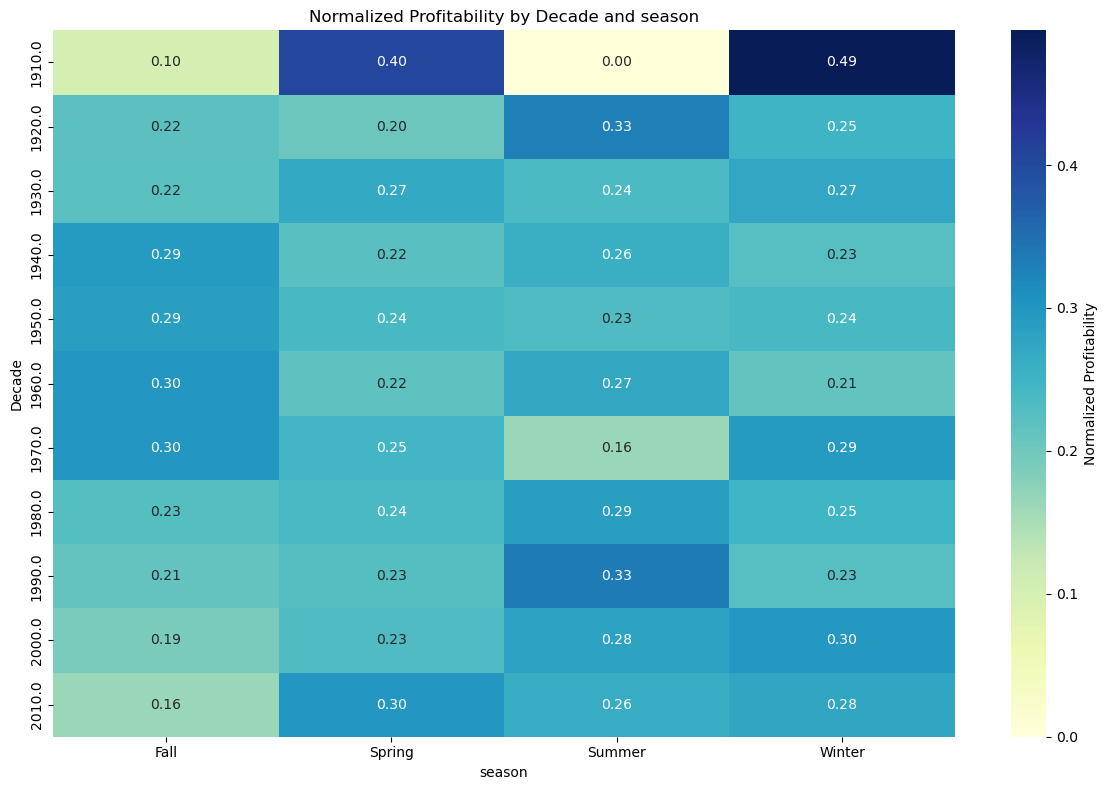

In [25]:
heatmap_data = df_filtered.pivot_table(
    index="decade", 
    columns="season", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Normalize profitability per decade (row-wise normalization)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Display the normalized heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_normalized,
    cmap="YlGnBu",
    annot=True,  # Show the normalized values
    fmt=".2f",   # Format values to 2 decimal places
    cbar_kws={"label": "Normalized Profitability"}
)

# Add titles and labels
plt.title("Normalized Profitability by Decade and season")
plt.xlabel("season")
plt.ylabel("Decade")

# Show the plot
plt.tight_layout()
plt.show()

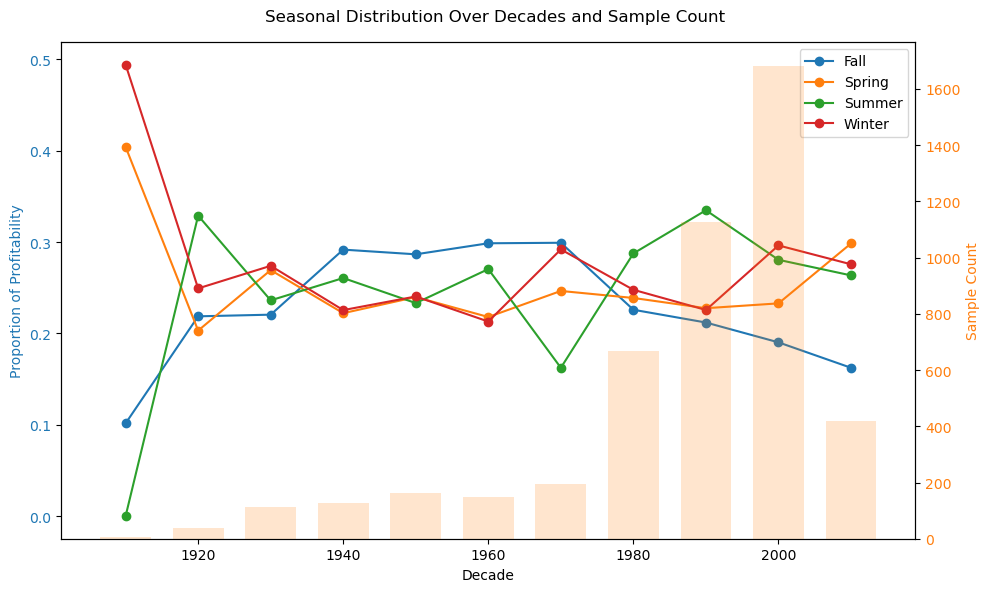

In [26]:


counts = df_filtered['decade'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Revenue
ax1.set_xlabel("Decade")
ax1.set_ylabel("Proportion of Profitability", color="tab:blue")
for season in ['Fall', 'Spring', 'Summer', 'Winter']:
    ax1.plot(heatmap_data_normalized.index, heatmap_data_normalized[season], label=season, marker='o')
#ax1.tick_params(axis='x', heatmap_data_normalized.index, rotation=45)
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.legend()

# Plot Sample Count on a secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(counts.index, counts, color="tab:orange", alpha=0.2, label="Sample Count",width=7)
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Add a title and layout adjustments
fig.suptitle("Seasonal Distribution Over Decades and Sample Count")
fig.tight_layout()
plt.show()

In [27]:
#fall movies were popular, now not anymore. 

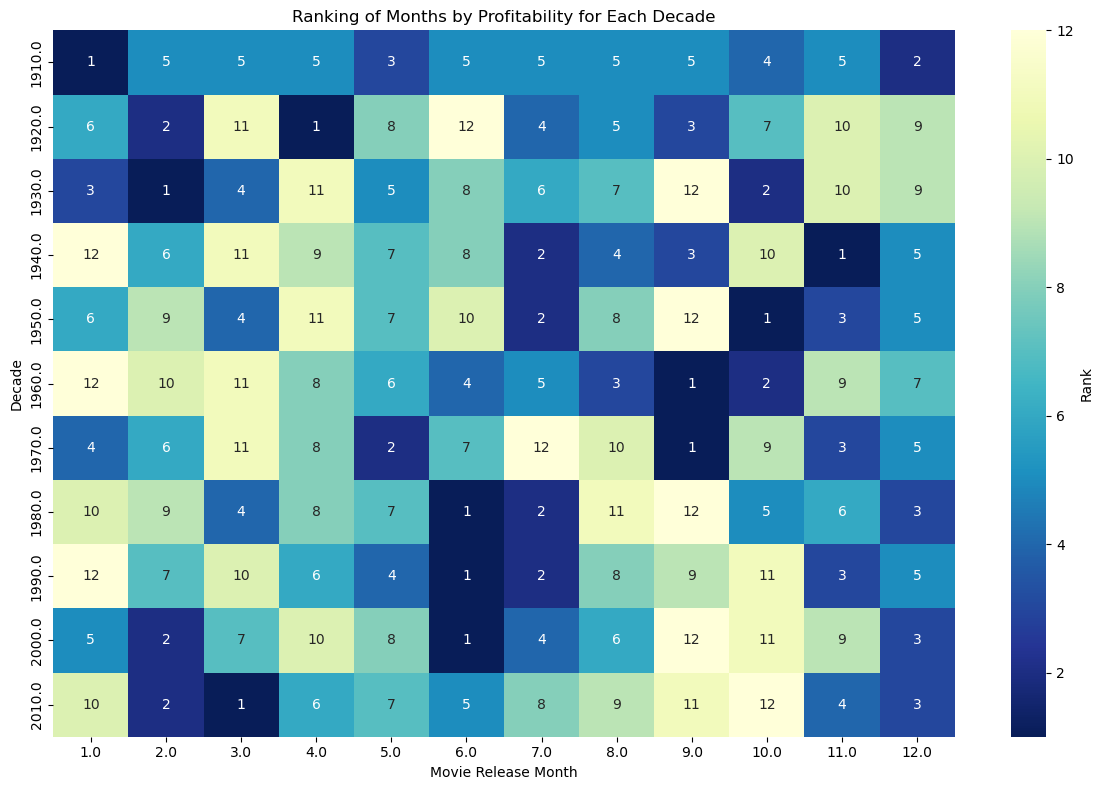

In [28]:
# Create the pivot table
heatmap_data = df_filtered.pivot_table(
    index="decade", 
    columns="Movie release month", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Rank the months for each decade (row-wise ranking)
month_ranks = heatmap_data.rank(axis=1, ascending=False, method="dense")

# Display the ranked table

# Optionally, visualize the rankings as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    month_ranks,
    cmap="YlGnBu_r",  # Reverse the color map to have higher ranks darker
    annot=True,       # Show the rank values
    fmt=".0f",        # Integer format
    cbar_kws={"label": "Rank"}
)

# Add titles and labels
plt.title("Ranking of Months by Profitability for Each Decade")
plt.xlabel("Movie Release Month")
plt.ylabel("Decade")

# Show the plot
plt.tight_layout()
plt.show()

# Q2

### profitability distribution : why do all this analysis to optimize? Does it really matter?
X-axis: Profitability (Box Office / Budget)
Y-axis: Frequency (number of movies)
Conclusion: Some movies very profitable, others not. We want high profitability. What would influence it?



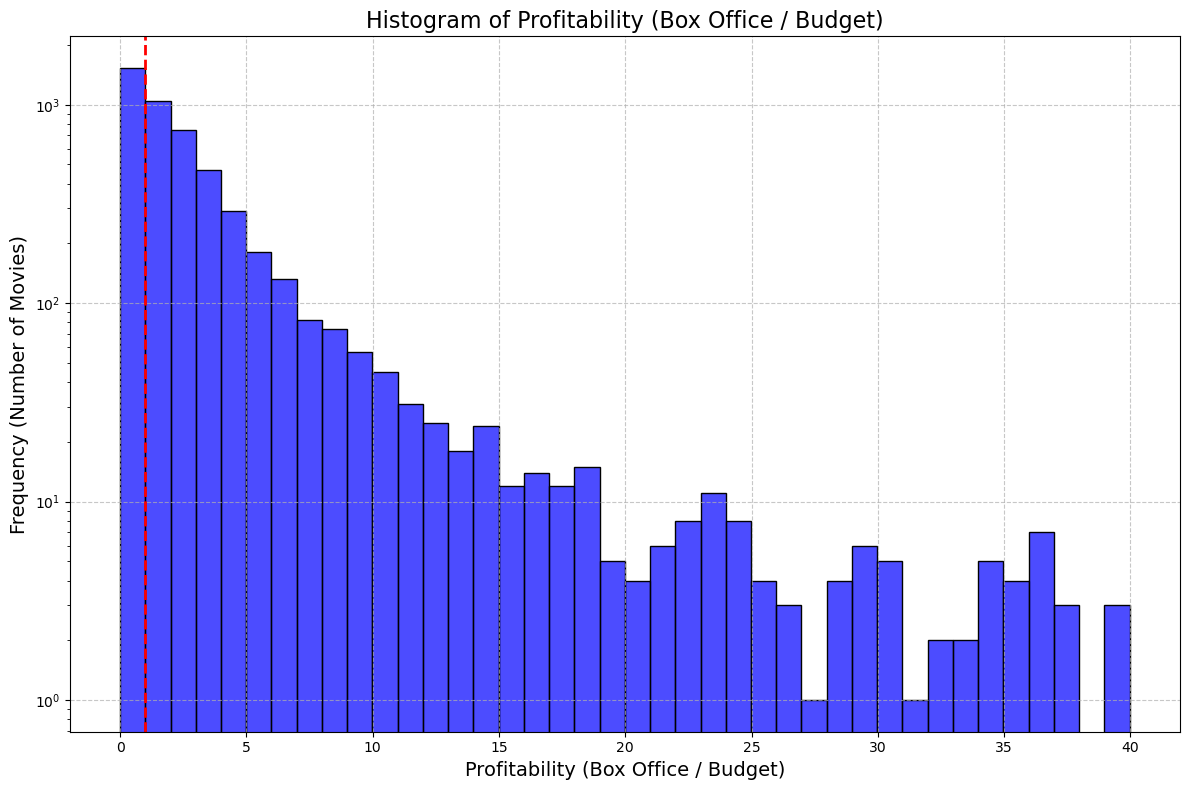

In [31]:
df_filtered = df_movies.dropna(subset=['budget', 'Movie box office revenue','Movie release year'])
df_filtered = df_filtered[df_filtered['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_filtered = df_filtered[df_filtered['budget'] > 10000]

df_filtered['profitability'] = df_filtered['Movie box office revenue']/df_filtered['budget']

df_filtered = df_filtered[df_filtered['profitability'] < 40]



plt.figure(figsize=(12, 8))
sns.histplot(data=df_filtered, x='profitability', bins=40, kde=False, color="blue", alpha=0.7)
plt.yscale('log')
plt.axvline(x=1, color="red", linestyle="--", linewidth=2)

# Add labels and title
plt.title("Histogram of Profitability (Box Office / Budget)", fontsize=16)
plt.xlabel("Profitability (Box Office / Budget)", fontsize=14)
plt.ylabel("Frequency (Number of Movies)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Profitability vs. Budget: are higher budget movies more profitable?
X-axis: Budget (log scale if needed)
Y-axis: Profitability (Box Office / Budget)
Conclusion: Reveal if profitability correlates with budget or is genre-dependent. 



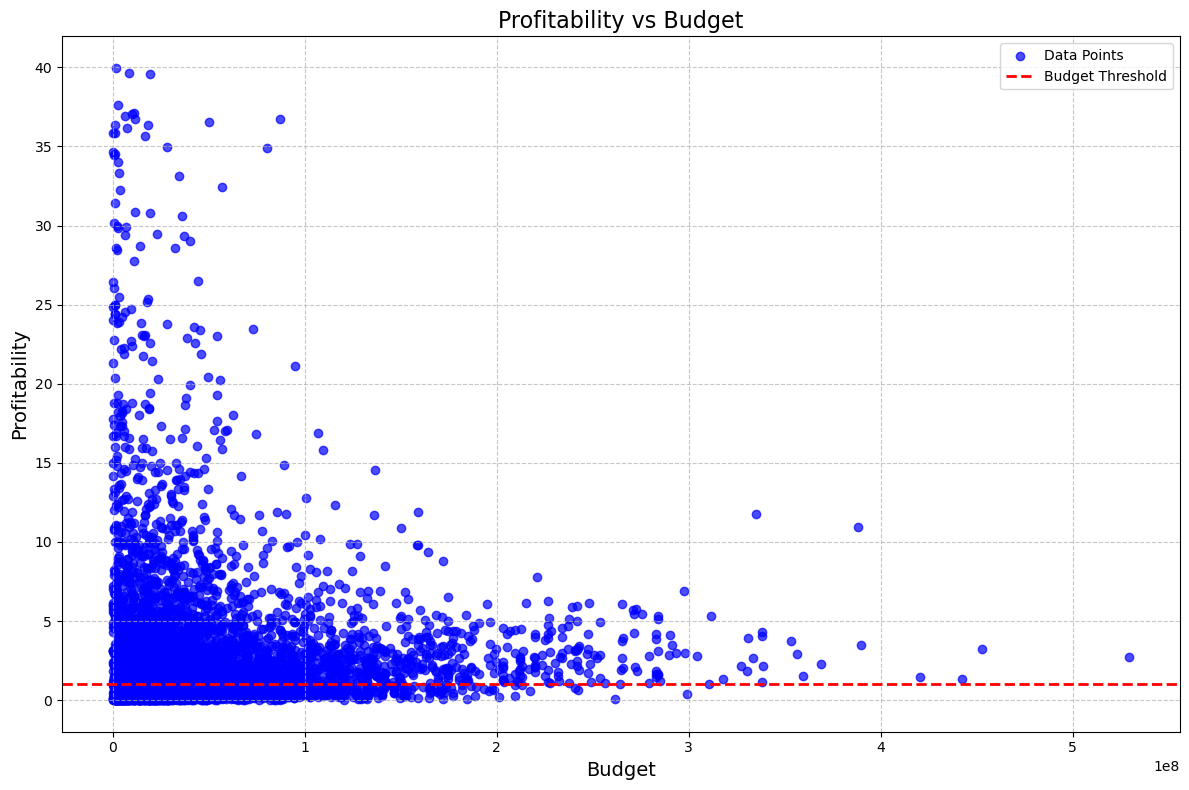

In [33]:


plt.figure(figsize=(12, 8))

# Scatter plot for budget vs profitability
plt.scatter(df_filtered['budget'], df_filtered['profitability'], alpha=0.7, color="blue", label="Data Points")


# Add a vertical line (for reference at x=1)
plt.axhline(y=1, color="red", linestyle="--", linewidth=2, label="Budget Threshold")

# Add labels, title, and legend
plt.title("Profitability vs Budget", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Profitability", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#lower budget films that are more profitable, but tend to fail more too : analysis is necessary ! 

In [ ]:
sns.jointplot(x=df_filtered['budget'], y=df_filtered['profitability'], kind="reg")

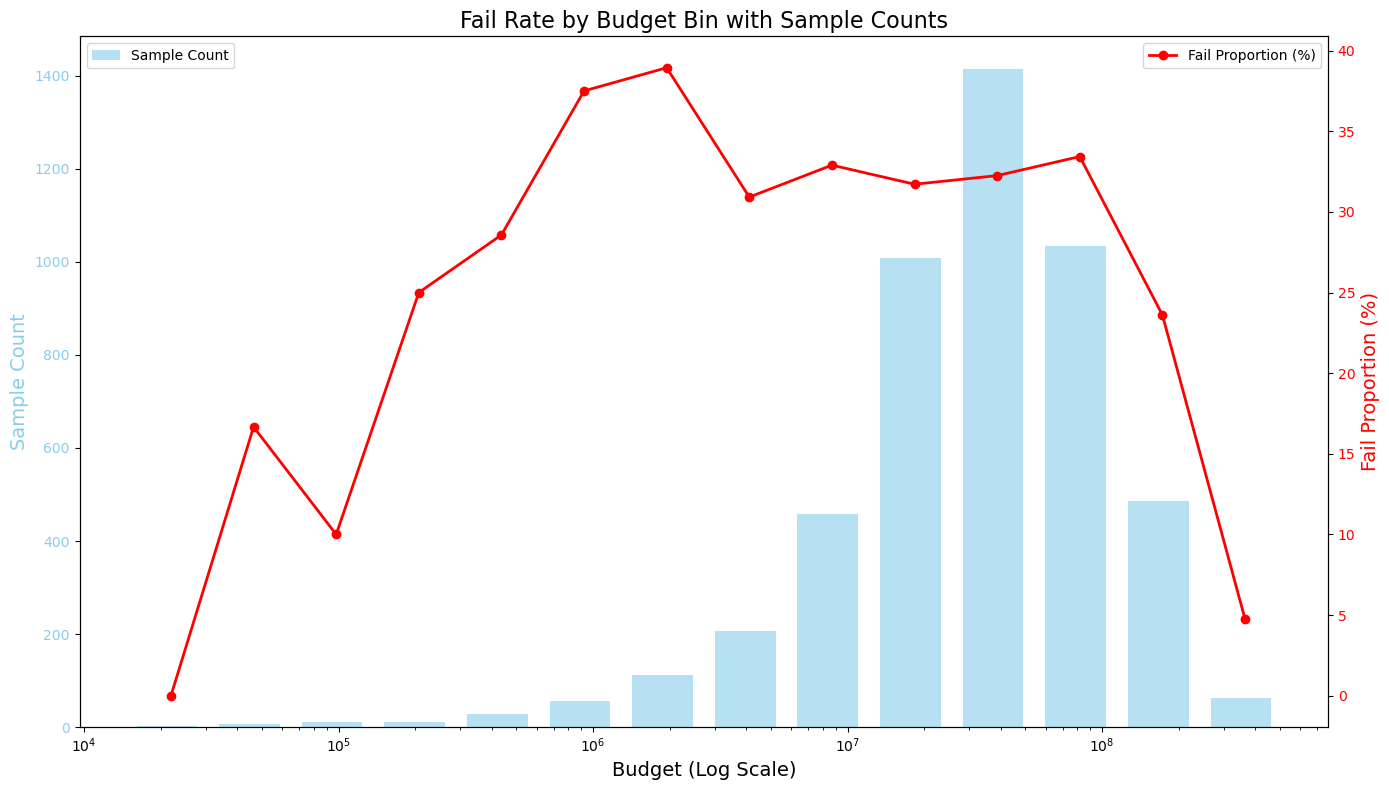

In [34]:
bins = np.logspace(
    np.log10(df_filtered['budget'].min()),
    np.log10(df_filtered['budget'].max()),
    15
)


df_filtered['budget_bin'] = pd.cut(
    df_filtered['budget'],
    bins=bins,
    include_lowest=True
)


# Total sample counts per bin
bin_counts = df_filtered['budget_bin'].value_counts().sort_index()

# Fail counts (profitability < 1) per bin
fail_counts = df_filtered[df_filtered['profitability'] < 1]['budget_bin'].value_counts().sort_index()

# Replace missing fail counts with 0 to align with all bins
fail_counts = fail_counts.reindex(bin_counts.index, fill_value=0)


fail_proportion = (fail_counts / bin_counts) * 100


bin_centers = np.sqrt(bins[:-1] * bins[1:])



fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot sample counts as bar chart on ax1
ax1.bar(
    bin_centers,
    bin_counts,
    width=np.diff(bins)*0.7,
    align='center',
    alpha=0.6,
    color='skyblue',
    label='Sample Count'
)

# Set x-axis to logarithmic scale
ax1.set_xscale('log')

# Set labels and title for ax1
ax1.set_xlabel("Budget (Log Scale)", fontsize=14)
ax1.set_ylabel("Sample Count", fontsize=14, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a twin y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot fail proportion as a line plot on ax2
ax2.plot(
    bin_centers,
    fail_proportion,
    color='red',
    marker='o',
    linewidth=2,
    label='Fail Proportion (%)'
)

# Set label for ax2
ax2.set_ylabel("Fail Proportion (%)", fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set plot title
plt.title("Fail Rate by Budget Bin with Sample Counts", fontsize=16)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

### A first hypothesis to test is that genres and themes tend to have more successful movies, regardless when they release.

boxplot profitability / genre x 

boxplot profitability / themes x 

#clearly ... most popular, however, is it due to them releasing at a specific time? 

X-axis: Release month 
Y-axis: Movie genre (theme)
Color Intensity: Average profitability 




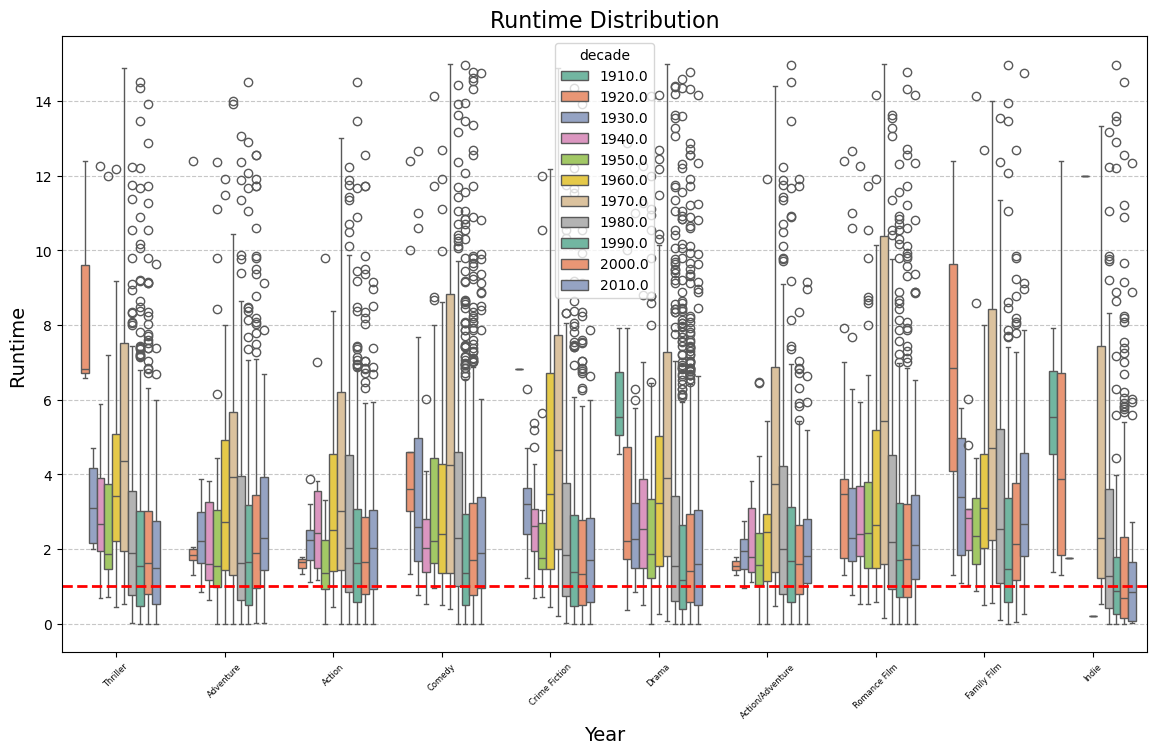

In [36]:
df_top_genres = df_explode[df_explode['Movie genres'].isin(top_10_genres.index)]


plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie genres",
    y="profitability",
    data=df_top_genres,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
plt.xticks(fontsize=6, rotation=45)
#plt.xticks([])

plt.show()

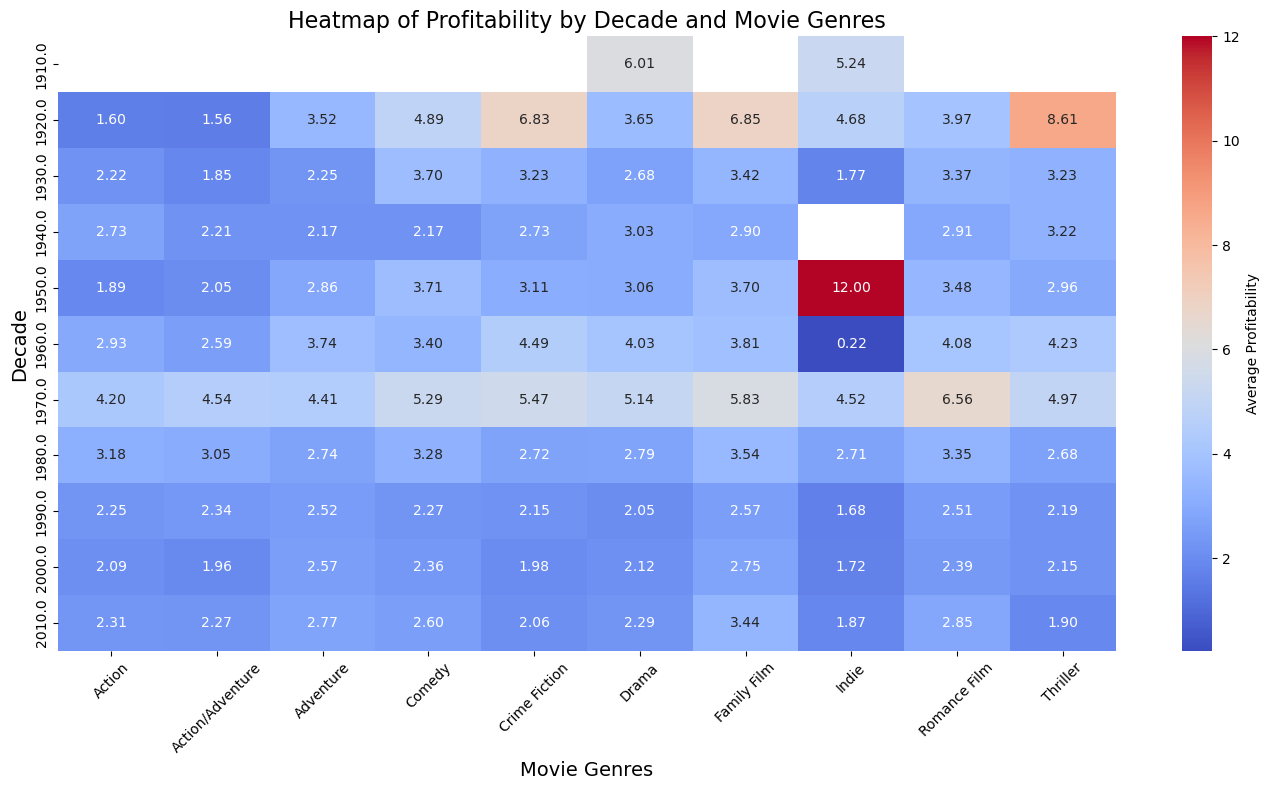

In [37]:
df_top_genres = df_explode[df_explode['Movie genres'].isin(top_10_genres.index)]

# Prepare data for heatmap
decade_genre_profitability = df_top_genres.groupby(['decade', 'Movie genres'])['profitability'].mean().reset_index()
pivot_table = decade_genre_profitability.pivot(index='decade', columns='Movie genres', values='profitability')

plt.figure(figsize=(14, 8))

# Create heatmap
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Average Profitability'}
)

plt.title("Heatmap of Profitability by Decade and Movie Genres", fontsize=16)
plt.xlabel("Movie Genres", fontsize=14)
plt.ylabel("Decade", fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### which months most movies of a certain theme/genre release : do the industry follow the standards?
X-axis: Release month 
Y-axis: Movie genre (theme)
Color Intensity: #

. Word Clouds
Create word clouds from movie themes or keywords found in plot summaries, sized by average profitability. This helps visualize which themes are more associated with profitable movies.



###  theme-genre combinations are more successful. For instance, “heroic” themes might work well in action films but not in romantic comedies.
X-axis: Movie genre
Y-axis: Dominant theme keywords
Color Intensity: Average profitability

. Word Clouds
Create word clouds from movie themes or keywords found in plot summaries, sized by average profitability. This helps visualize which themes are more associated with profitable movies.



### Profitability vs. Movie Length (Runtime):
**#runtime changed over time**
year - av runtime plot boxplot

X-axis: Runtime (in minutes) 
Y-axis: Profitability
Insight: Determine if movie length influences profitability and whether longer films perform better.




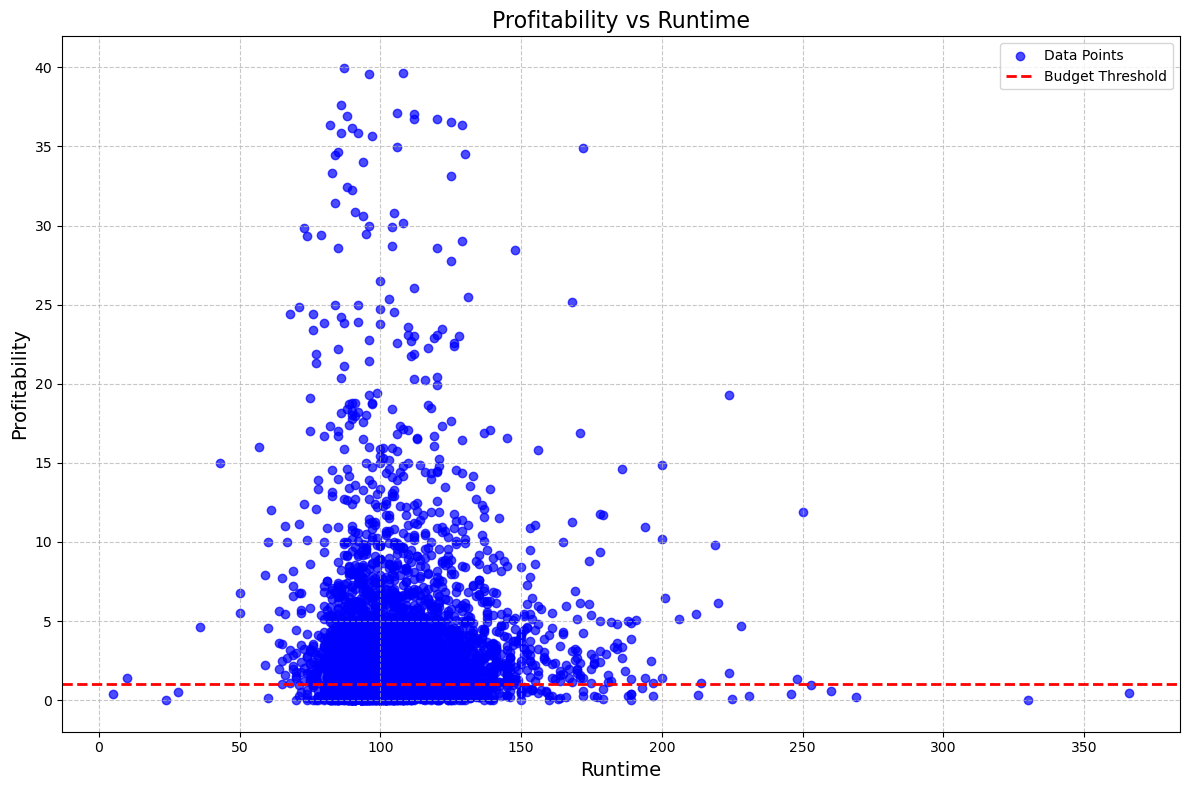

In [41]:

df_filtered = df_filtered[df_filtered['Movie runtime'] < 500]


plt.figure(figsize=(12, 8))

# Scatter plot for budget vs profitability
plt.scatter(df_filtered['Movie runtime'], df_filtered['profitability'], alpha=0.7, color="blue", label="Data Points")


# Add a vertical line (for reference at x=1)
plt.axhline(y=1, color="red", linestyle="--", linewidth=2, label="Budget Threshold")

# Add labels, title, and legend
plt.title("Profitability vs Runtime", fontsize=16)
plt.xlabel("Runtime", fontsize=14)
plt.ylabel("Profitability", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_34708\1272232478.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aggregated = df_filtered.groupby('Runtime Bin', as_index=False).agg(


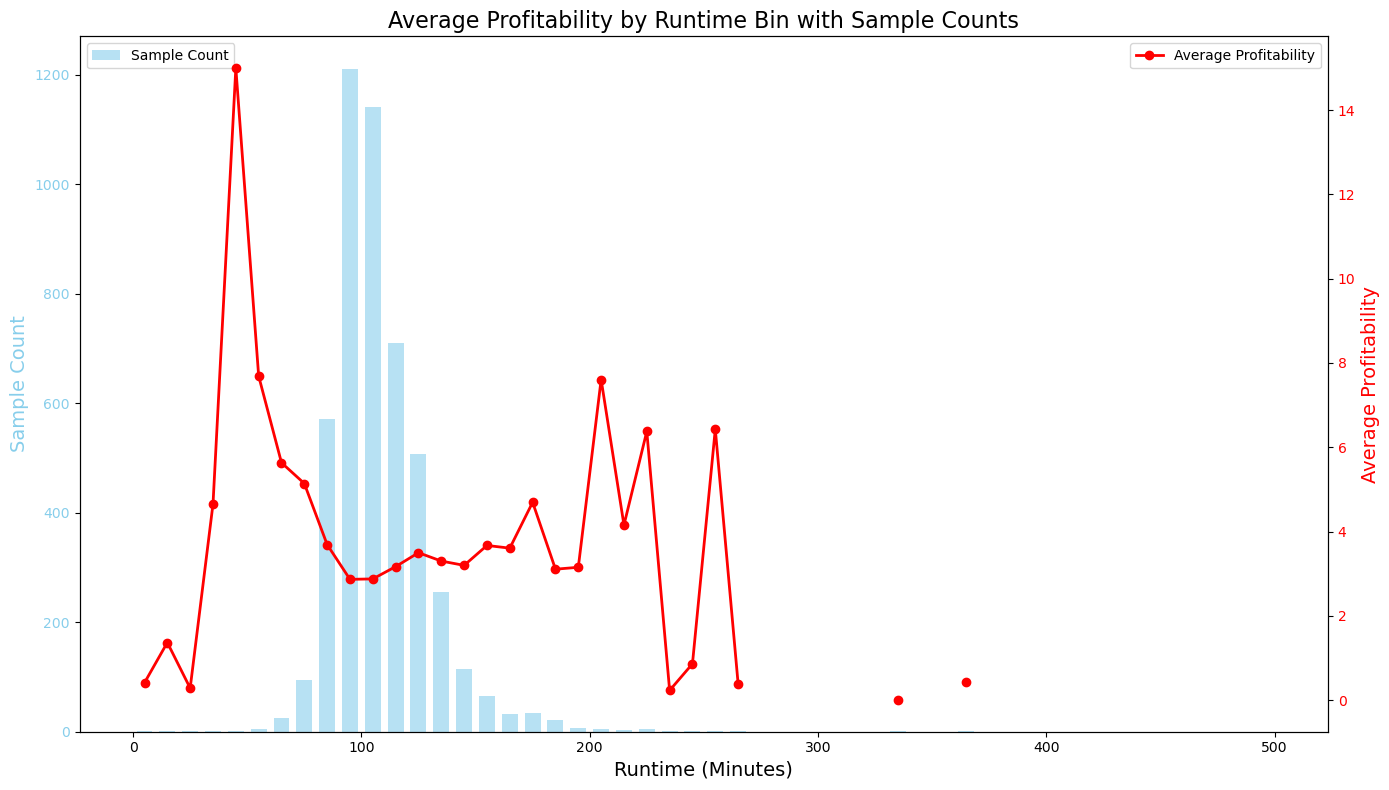

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create 10-minute bins for the runtime
df_filtered['Runtime Bin'] = pd.cut(df_filtered['Movie runtime'], bins=range(0, 510, 10), right=False)

# Aggregating data by calculating the mean profitability for each runtime bin and sample count
df_aggregated = df_filtered.groupby('Runtime Bin', as_index=False).agg(
    profitability=('profitability', 'mean'),
    sample_count=('profitability', 'count')
)

# Extracting the midpoint of each bin for plotting
df_aggregated['Runtime Midpoint'] = df_aggregated['Runtime Bin'].apply(lambda x: x.left + 5)

# Prepare bin centers and counts
bin_centers = df_aggregated['Runtime Midpoint']
bin_counts = df_aggregated['sample_count']
profitability = df_aggregated['profitability']

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot sample counts as bar chart on ax1
ax1.bar(
    bin_centers,
    bin_counts,
    width=10 * 0.7,  # Adjusted for bin width of 10
    align='center',
    alpha=0.6,
    color='skyblue',
    label='Sample Count'
)

# Set x-axis to logarithmic scale
ax1.set_xlabel("Runtime (Minutes)", fontsize=14)
ax1.set_ylabel("Sample Count", fontsize=14, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a twin y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot profitability as a line plot on ax2
ax2.plot(
    bin_centers,
    profitability,
    color='red',
    marker='o',
    linewidth=2,
    label='Average Profitability'
)

# Set label for ax2
ax2.set_ylabel("Average Profitability", fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set plot title
plt.title("Average Profitability by Runtime Bin with Sample Counts", fontsize=16)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

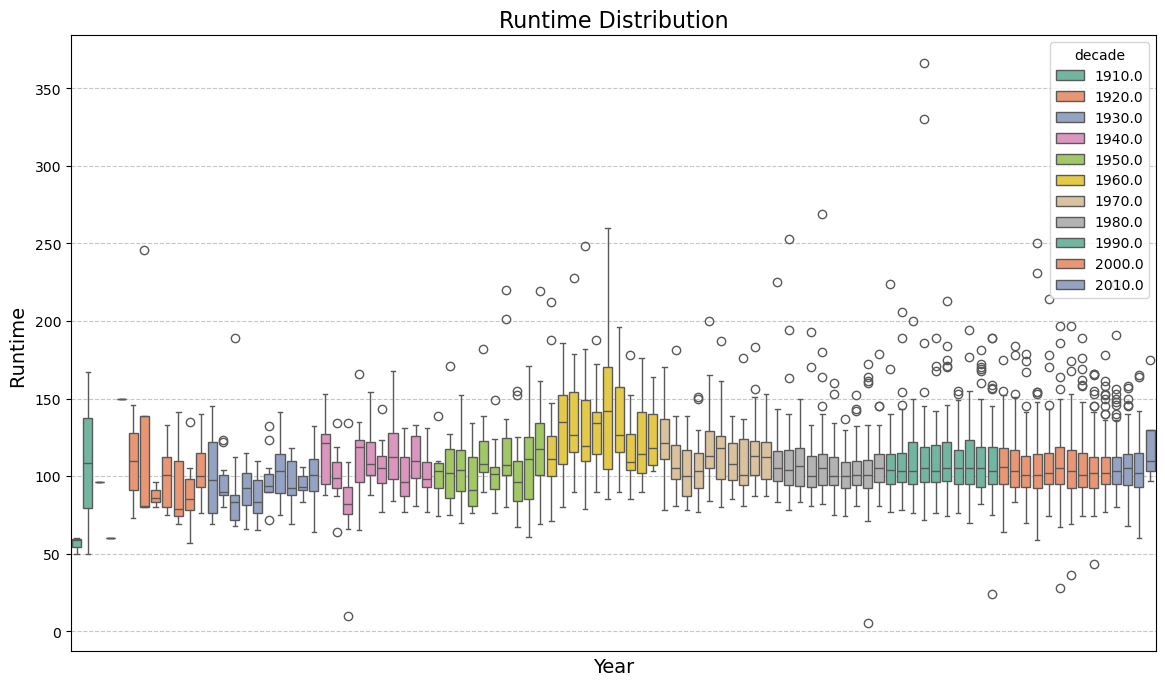

In [43]:
df_filtered["Movie release year"] = df_filtered["Movie release year"].astype(int)

plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release year",
    y="Movie runtime",
    data=df_filtered,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
#plt.xticks(fontsize=6, rotation=45)
plt.xticks([])

plt.show()

In [44]:
#kinda constant, maybe a small spike in the 60s

### Combine the results Bubble Charts
Bubble Chart of Profitability by Budget and Runtime:
X-axis: Budget
Y-axis: Runtime
Bubble Size: Profitability (Box Office / Budget)
Bubble Color: Movie genre or theme
Insight: See if a sweet spot exists where budget and runtime balance for maximum profitability.




In [ ]:
heatmap_data = df_filtered.pivot_table(
    index="decade", 
    columns="season", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Normalize profitability per decade (row-wise normalization)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)





counts = df_filtered['decade'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Revenue
ax1.set_xlabel("Decade")
ax1.set_ylabel("Proportion of Profitability", color="tab:blue")
for season in ['Fall', 'Spring', 'Summer', 'Winter']:
    ax1.plot(heatmap_data_normalized.index, heatmap_data_normalized[season], label=season, marker='o')
#ax1.tick_params(axis='x', heatmap_data_normalized.index, rotation=45)
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.legend()

# Plot Sample Count on a secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(counts.index, counts, color="tab:orange", alpha=0.2, label="Sample Count",width=7)
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Add a title and layout adjustments
fig.suptitle("Seasonal Distribution Over Decades and Sample Count")
fig.tight_layout()
plt.show()

In [3]:
# Create a new column to differentiate "2000-2010" and "All"
df_filtered['Decade Filter'] = df_filtered['decade'].apply(
    lambda x: "2000-2010" if x in [2000, 2010] else "All"
)

# Include both "2000-2010" and "All" data
df_filtered['Decade Filter'] = "All"
df_2000_2010 = df_filtered[df_filtered['decade'].isin([2000, 2010])].copy()
df_2000_2010['Decade Filter'] = "2000-2010"

# Combine data for plotting
combined_df = pd.concat([df_filtered, df_2000_2010])

# Calculate sample counts for annotations
counts_all = df_filtered['season'].value_counts().sort_index()
counts_2000_2010 = df_2000_2010['season'].value_counts().sort_index()

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(
    x="season",
    y="profitability",
    data=combined_df,
    hue="Decade Filter",
    palette="Set2"
)

# Add titles and labels
plt.title("Profitability Distribution by Season (All vs 2000-2010)", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the sample counts
ax = plt.gca()
y_max = combined_df['profitability'].max()
y_min = combined_df['profitability'].min()
y_range = y_max - y_min

for i, season in enumerate(sorted(counts_all.index)):
    # Sample count for "All"
    count_all = counts_all.get(season, 0)
    ax.text(
        i - 0.2,  # Shift slightly left for "All"
        y_max + 0.05 * y_range,
        f'n={count_all}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color="#95a3c3"
    )
    # Sample count for "2000-2010"
    count_2000_2010 = counts_2000_2010.get(season, 0)
    ax.text(
        i + 0.2,  # Shift slightly right for "2000-2010"
        y_max + 0.05 * y_range,
        f'n={count_2000_2010}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color="green"
    )

# Adjust y-axis limits and legend
plt.ylim(y_min - 0.5, y_max + 0.15 * y_range)
plt.legend(title="Decade Filter", loc="upper right", fontsize=12)

# Show the plot
plt.show()







NameError: name 'df_filtered' is not defined

### WHich is most important??? Decision Trees & Feature Importance (Machine Learning)
Train a decision tree or regression model with features like budget, release month, genre, theme, runtime, and year to predict profitability.
Visualize the resulting feature importance chart showing which factors influence profitability the most.


In [76]:
counts = df_filtered['season'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="season",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "season",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("season", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
#month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.show()


#only 2000s+

SyntaxError: invalid syntax (4247494878.py, line 1)

In [78]:
#What about movies translated in multiple languages?

In [ ]:
# Bubble chart linking month to profitability for each genre along with the movies budget.
df_bubble = df_exploded.copy()  
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Keeping only last 20 years
df_bubble = df_bubble[df_bubble['Movie genres'].isin(genres_list)].reset_index(drop=True)

df_aggregated = df_bubble.groupby(['Movie genres', 'Movie release month']).agg(median_profitability=('profitability', 'median'),median_budget=('budget', 'median')).reset_index()

#PLOT
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(data=df_aggregated,y="median_profitability", x="Movie release month", size="median_budget",  sizes=(200, 1500),  hue="Movie genres",  palette="Set2", alpha=0.8 )

bubble_chart.set_title("Bubble Chart of Profitability by Release Month (Last 20 Years)", fontsize=16)
bubble_chart.set_xlabel("Release Month", fontsize=12)
bubble_chart.set_ylabel("Median Profitability", fontsize=12)

#Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
new_labels = [
    "MOVIE GENRE", 
    'Action', 
    'Family', 
    'LGBT', 
    'Romantic', 
    'Superhero', 
    'War',
    "MEDIAN BUDGET",  
    "40M",  
    "80M",  
    "120M",  
    "160M",
    "200M"
]


plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, borderpad=1.5,labelspacing=2.5, frameon=True, borderaxespad=1)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(1,12,12), labels=month_names)
plt.tight_layout()
plt.show()

In [ ]:
#Heatmap linking themes to genres, for profitability (including sample count between parenthesis)

#Prepare data
df_heatmap = df_exploded.copy()  # Use your filtered dataset
df_heatmap = df_heatmap[df_heatmap['decade'] > 1989]  # Filter by decade
df_heatmap = df_heatmap[df_heatmap['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Combine median profitability and sample count into a str
df_aggregated = df_heatmap.groupby(['Movie genres', 'Movie release month']).agg(
    median_profitability=('profitability', 'median'),median_budget=('budget', 'median'),
    sample_size=('profitability', 'size'),median_runtime=('Movie runtime', 'median')).reset_index()

df_heatmap_profitability = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_profitability")
df_heatmap_count = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="sample_size")
df_heatmap_budget = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_budget")
df_heatmap_runtime = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_runtime")

annotations = pd.DataFrame("", index=df_heatmap_profitability.index, columns=df_heatmap_profitability.columns, dtype=object)
for row in annotations.index:
    for col in annotations.columns:
        profitability = df_heatmap_profitability.loc[row, col]
        budget = df_heatmap_budget.loc[row, col]
        runtime = df_heatmap_runtime.loc[row, col]
        count = df_heatmap_count.loc[row, col]
        #if not pd.isna(profitability) and not pd.isna(count) and pd.isna(runtime) and pd.isna(budget):
        annotations.loc[row, col] = f"{profitability:.2f}\nN = {int(count)}\n{int(runtime)} min\n${int(budget)//1000000} M"

#Plot 
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap_profitability, annot=annotations,  fmt="", cmap="YlGnBu",linewidths=0.5,cbar_kws={'label': 'Median Profitability'})

plt.title("Heatmap of Median Profitability by Movie Genres and Release Months", fontsize=16)
plt.xlabel("Movie Release Month", fontsize=12)
plt.ylabel("Movie Genres", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.xticks(ticks=np.linspace(0.5,11.5,12), labels=month_names)
plt.tight_layout()
plt.show()

In [ ]:
# Bubble chart linking month to profitability for each genre along with the movies budget.
df_bubble = df_exploded.copy()  
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Keeping only last 20 years
df_bubble = df_bubble[df_bubble['Movie genres'].isin(genres_list)].reset_index(drop=True)

df_aggregated = df_bubble.groupby(['Movie genres', 'Movie release month']).agg(median_profitability=('profitability', 'median'),median_runtime=('Movie runtime', 'median')).reset_index()

#PLOT
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(data=df_aggregated,y="median_profitability", x="Movie release month", size="median_runtime",  sizes=(200, 1500),  hue="Movie genres",  palette="Set2", alpha=0.8 )

bubble_chart.set_title("Bubble Chart of Profitability by Release Month (Last 20 Years)", fontsize=16)
bubble_chart.set_xlabel("Release Month", fontsize=12)
bubble_chart.set_ylabel("Median Profitability", fontsize=12)

#Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
new_labels = [
    "MOVIE GENRE", 
    'Action', 
    'Family', 
    'LGBT', 
    'Romantic', 
    'Superhero', 
    'War',
    "MEDIAN BUDGET",  
    "96 min",  
    "104 min",  
    "112 min",  
    "120 min",  
    "128 min",  


]

plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, borderpad=1.5,labelspacing=2.5, frameon=True, borderaxespad=1)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(1,12,12), labels=month_names)
plt.tight_layout()
plt.show()

In [ ]:
#Prepare data
df_heatmap = df_exploded.copy()  # Use your filtered dataset
df_heatmap = df_heatmap[df_heatmap['decade'] > 1989]  # Filter by decade
df_heatmap = df_heatmap[df_heatmap['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Combine median profitability and sample count into a str
df_aggregated = df_heatmap.groupby(['Movie genres', 'Movie release month']).agg(
    median_profitability=('profitability', 'median'),median_budget=('budget', 'median'),
    sample_size=('profitability', 'size'),median_runtime=('Movie runtime', 'median')).reset_index()

df_heatmap_profitability = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_profitability")
df_heatmap_count = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="sample_size")
df_heatmap_budget = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_budget")
df_heatmap_runtime = df_aggregated.pivot(index="Movie genres", columns="Movie release month", values="median_runtime")



# Median Runtime by Month and Genre
median_runtime_by_month = df_aggregated.groupby('Movie release month')['median_runtime'].median()
median_runtime_by_genre = df_aggregated.groupby('Movie genres')['median_runtime'].median()






df_aggregated['median_runtime_display'] = df_aggregated['median_runtime'].apply(lambda x: f"{x:.1f} min")
df_aggregated['median_budget_display'] = df_aggregated['median_budget'].apply(lambda x: f"${x / 1000000:.1f} M")

fig = px.scatter(
    df_aggregated,
    x="Movie release month",
    y="median_profitability",
    size="median_budget",  # Default size variable
    color="Movie genres",
    hover_name="Movie genres",
    hover_data={
        "sample_size": ":.0f",
        "median_budget_display": True,
        "median_runtime_display": True,
        "median_profitability": ":.1f",
        "Movie release month": True,
        "median_budget": False,
        "Movie genres": False
    },
    size_max=39,
    labels={
        "median_profitability": "Median Profitability",
        "median_budget_display": "Median Budget",
        "Movie release month": "Release Month",
        "median_runtime_display": "Median Runtime"
    },
    title="Interactive Bubble Chart of Profitability by Release Month (Last 20 Years)"
)

fig.update_traces(
    marker=dict(
        sizemode='area',
        sizemin=5
    )
)

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
fig.update_xaxes(
    tickvals=list(range(1, 13)),
    ticktext=month_names[:12]  # just in case we only have 6 months, still fine
)

fig.update_layout(
    title_font_size=18,
    xaxis_title="Release Month",
    yaxis_title="Median Profitability",
    legend_title="Movie Genres",
    width=900,
    height=600
)


fig.show()